<a href="https://colab.research.google.com/github/AryanPrajapati02/ml/blob/main/project3__plant_disease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import random
random.seed(0)
import numpy as np

np.random.seed(0)

import tensorflow as tf

tf.random.set_seed(0)
from zipfile import ZipFile
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

In [2]:
import os
import json


In [3]:
!pip install kaggle
kaggle_cred = json.load(open('kaggle.json'))
os.environ['KAGGLE_USERNAME'] = kaggle_cred['username']
os.environ['KAGGLE_KEY'] = kaggle_cred['key']
!kaggle datasets download -d abdallahalidev/plantvillage-dataset
with ZipFile('plantvillage-dataset.zip', 'r') as zipObj:
   zipObj.extractall()
   print('Done')

Dataset URL: https://www.kaggle.com/datasets/abdallahalidev/plantvillage-dataset
License(s): CC-BY-NC-SA-4.0
100% 2.04G/2.04G [00:29<00:00, 136MB/s]
100% 2.04G/2.04G [00:29<00:00, 73.2MB/s]
Done


In [4]:
base_dir = 'plantvillage-dataset/color'

In [5]:

print(os.listdir(base_dir))

['Tomato___Spider_mites Two-spotted_spider_mite', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Potato___healthy', 'Apple___Apple_scab', 'Pepper,_bell___Bacterial_spot', 'Tomato___Bacterial_spot', 'Apple___healthy', 'Corn_(maize)___healthy', 'Apple___Black_rot', 'Grape___healthy', 'Tomato___Leaf_Mold', 'Tomato___Late_blight', 'Tomato___Early_blight', 'Squash___Powdery_mildew', 'Tomato___Target_Spot', 'Cherry_(including_sour)___Powdery_mildew', 'Corn_(maize)___Northern_Leaf_Blight', 'Potato___Early_blight', 'Grape___Esca_(Black_Measles)', 'Tomato___Tomato_mosaic_virus', 'Strawberry___Leaf_scorch', 'Raspberry___healthy', 'Apple___Cedar_apple_rust', 'Soybean___healthy', 'Peach___Bacterial_spot', 'Cherry_(including_sour)___healthy', 'Peach___healthy', 'Pepper,_bell___healthy', 'Tomato___Septoria_leaf_spot', 'Strawberry___healthy', 'Corn_(maize)___Common_rust_', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Tomato___healthy', 'Grape___Black_rot', 'Blueberry___healthy', 'Potato___L

In [6]:
from tensorflow.keras import layers , models


In [7]:
Image_size = 256
Batch_size = 32
Channels = 3

In [8]:
dataset = tf.keras.preprocessing.image_dataset_from_directory('plantvillage-dataset' , batch_size=Batch_size , image_size = (256 , 256) , shuffle = True)




Found 160411 files belonging to 3 classes.


In [9]:
class_name = dataset.class_names
class_name

['color', 'grayscale', 'segmented']

In [10]:
len(dataset)

5013

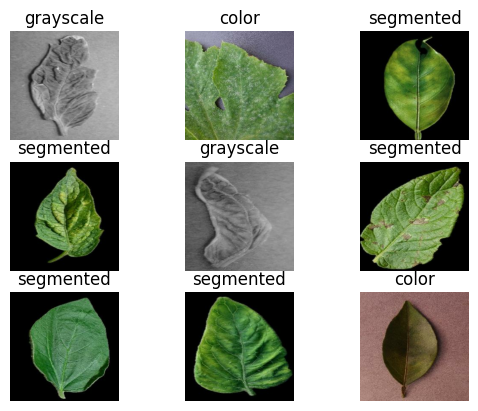

In [11]:
for image_batch , label_batch in dataset.take(1):
  for i in range(9):
    ax = plt.subplot(3,3,i+1)
    plt.imshow(image_batch[i].numpy().astype('uint8'))
    plt.title(class_name[label_batch[i]])
    plt.axis('off')
  # print(image_batch.shape)
  # print(label_batch.numpy())

In [12]:
dataset2 = tf.keras.preprocessing.image.ImageDataGenerator(rescale = 1./255,  validation_split=0.2)

In [13]:
train_data = dataset2.flow_from_directory(base_dir , target_size = (256 , 256) , batch_size = Batch_size , class_mode = 'categorical' , subset = 'training')


validation_data = dataset2.flow_from_directory(base_dir , target_size = (256 , 256) , batch_size = Batch_size , class_mode = 'categorical' , subset = 'validation')



Found 43456 images belonging to 38 classes.
Found 10849 images belonging to 38 classes.


In [14]:
# train_data  = train_data.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
# validation_data = validation_data.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)

In [15]:
# resize_and_rescale = tf.keras.Sequential([
#     layers.experiment.preprocessing.Resizing(256, 256),  # Changed from layers.experimental.preprocessing.Resizing
#     layers.preprocessing.Rescaling(1./255)   # Changed from layers.experimental.preprocessing.Rescaling
# ])

In [16]:
model = models.Sequential([
    layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(256, 256, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dense(train_data.num_classes, activation='softmax')

])
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 254, 254, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 127, 127, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 125, 125, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 62, 62, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 246016)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │      62,980,352 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 38)                  │           9,766 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 63,009,510 (240.36 MB)

 Trainable params: 63,009,510 (240.36 MB)

 Non-trainable params: 0 (0.00 B)

In [17]:
model.compile(optimizer = 'adam' , loss = 'categorical_crossentropy' , metrics = ['accuracy'])

In [19]:
history = model.fit(train_data , epochs = 5, validation_data = validation_data , steps_per_epoch = train_data.samples// Batch_size , validation_steps = validation_data.samples // Batch_size)

Epoch 1/5
   1/1358 ━━━━━━━━━━━━━━━━━━━━ 4:04:24 11s/step - accuracy: 0.0000e+00 - loss: 9.7894

KeyboardInterrupt: 

In [ ]:
model.evaluate(validation_data)

In [22]:
def load_and_preprocess_image(image_path , target_size =(256,256)):
   img = Image.open(image_path)
   img = img.resize(target_size)
   img_array = np.array(img)

   img_array = np.expand_dims(img_array, axis = 0)
   img_array = img_array.astype('float32') / 255.0
   return img_array


  ##function

def predict_image_class(loaded_model , image_path , class_indices):
   preprocessed_img = load_and_preprocess_image(image_path)
   prediction = model.predict(preprocessed_img)
   predicted_class_index = np.argmax(prediction, axis=1)[0]
   predicted_class = class_indices[predicted_class_index]
   return predicted_class

In [ ]:
model.save('plant_disease_model.h5')

In [25]:
class_indices = {v: k for k, v in train_data.class_indices.items()}
json.dump(class_indices, open('class_indices.json', 'w'))

In [ ]:
class_indices

In [21]:
from tensorflow.keras.models import load_model

# Load the saved model
loaded_model = load_model('plant_disease_model.h5')

In [27]:
image_path = 'tomato_he.JPG'
predicted_class = predict_image_class(loaded_model, image_path, class_indices)
print("Predicted Class:", predicted_class)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
Predicted Class: Soybean___healthy
